In [1]:
import os
from glob import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs

import sa_utils as sau
import plotting_utils as pu

from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import trend_metric_ids as metric_ids

In [2]:
# Set fonts
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

## Analysis

In [ ]:
# Calculate all and store
analysis_type = "averages"
# grids = ["LOCA2", "STAR-ESDM"]
grids = ["LOCA2"]
regrid_method = "nearest"
proj_slices = ["2040-2060", "2080-2100"]
hist_slices = [None, "1950-2014"]
fit_method = None
stationary = None

# Loop through metrics
for metric_id in metric_ids[:4]:
    # Get variable name
    col_name = metric_id.split("_")[1]
    # Do for each grid
    for grid in grids:
        # Do for each slice
        for proj_slice in proj_slices:
            for hist_slice in hist_slices:
                # Do for norm and not
                for normed in [True, False]:
                    norm_str = "_normed" if normed else ""
                    if normed == True and hist_slice is None:
                        continue # skip normalization for no change metrics
                    
                    # Check if done
                    save_file = f"{metric_id}{norm_str}_{proj_slice}_{hist_slice}_{grid}grid_{regrid_method}.nc"
                    if os.path.exists(f"{project_data_path}/results/{save_file}"):
                        print(f"Already done: {save_file}")
                        continue
            
                    # Calculate
                    with warnings.catch_warnings():
                        uc = sau.uc_all(metric_id=metric_id,
                                        grid=grid,
                                        fit_method=fit_method,
                                        stationary=stationary,
                                        regrid_method=regrid_method,
                                        proj_slice=proj_slice,
                                        hist_slice=hist_slice,
                                        normed=normed,
                                        col_name_main=col_name,
                                        col_name_boot=None,
                                        analysis_type=analysis_type)
                        # Store
                        uc.to_netcdf(f"{project_data_path}/results/{save_file}")
                        print(f"Done: {save_file}")
                        del uc # memory management

Already done: avg_tas_2040-2060_None_LOCA2grid_nearest.nc


## Plots

In [7]:
import importlib
importlib.reload(pu)

<module 'plotting_utils' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/plotting_utils.py'>

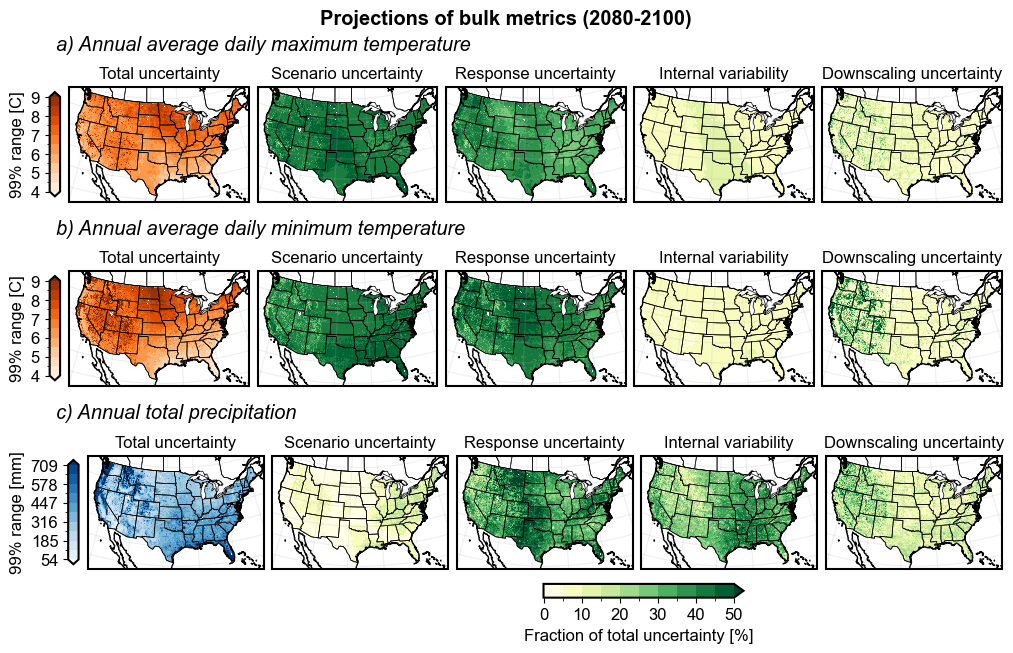

In [8]:
# Main plot
proj_slice = '2080-2100'
hist_slice = None
hist_str = f" relative to {hist_slice}" if hist_slice is not None else ""
grid = 'LOCA2'
norm = 'uc_99w'

fig = plt.figure(figsize=(10, 5.5), layout='constrained')
subfigs = fig.subfigures(3, 1, hspace=0.01)

fig.suptitle(f"Projections of bulk metrics ({proj_slice}{hist_str})", fontweight="bold", y=1.08)

# Loop through metrics
plot_metric_ids = ['avg_tasmax', 'avg_tasmin', 'sum_pr']

for idp, metric_id in enumerate(plot_metric_ids):
    axs = subfigs[idp].subplots(1, 5, subplot_kw=dict(projection=ccrs.LambertConformal()))
    p = pu.plot_uc_map(
        metric_id=metric_id,
        proj_slice=proj_slice,
        hist_slice=hist_slice,
        plot_col=metric_id.split("_")[1],
        return_period=None,
        grid=grid,
        fit_method=None,
        stationary=None,
        norm=norm,
        time_str=None,
        analysis_type="averages",
        vmax_uc = 50,
        fig=subfigs[idp],
        title = pu.subfigure_labels[idp],
        axs=axs,
        y_title=1.1
    )

# Create a new axes for the colorbar at the bottom
cbar_ax = fig.add_axes([0.5375, 0.01, 0.2, 0.025])  # [left, bottom, width, height]

# Add colorbar using the stored mappable
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Fraction of total uncertainty [%]')
    
plt.savefig('../figs/si/averages_abs_2080-2100.png', dpi=300, bbox_inches='tight')

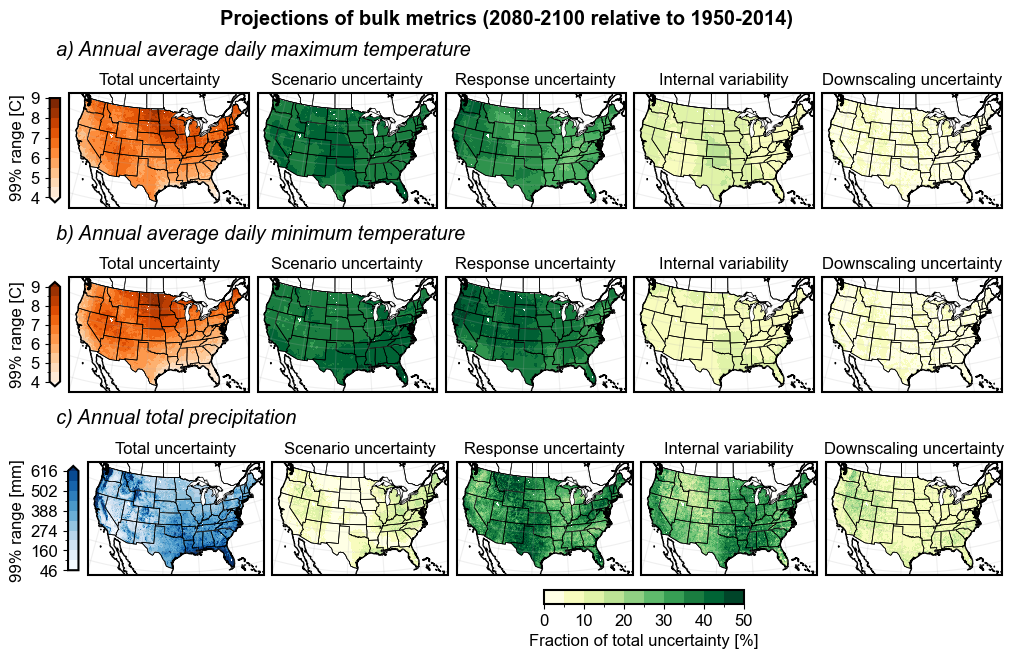

In [10]:
# Main plot
proj_slice = '2080-2100'
hist_slice = '1950-2014'
hist_str = f" relative to {hist_slice}" if hist_slice is not None else ""
grid = 'LOCA2'
norm = 'uc_99w'

fig = plt.figure(figsize=(10, 5.5), layout='constrained')
subfigs = fig.subfigures(3, 1, hspace=0.01)

fig.suptitle(f"Projections of bulk metrics ({proj_slice}{hist_str})", fontweight="bold", y=1.09)

# Loop through metrics
plot_metric_ids = ['avg_tasmax', 'avg_tasmin', 'sum_pr']

for idp, metric_id in enumerate(plot_metric_ids):
    axs = subfigs[idp].subplots(1, 5, subplot_kw=dict(projection=ccrs.LambertConformal()))
    p = pu.plot_uc_map(
        metric_id=metric_id,
        proj_slice=proj_slice,
        hist_slice=hist_slice,
        plot_col=metric_id.split("_")[1],
        return_period=None,
        grid=grid,
        fit_method=None,
        stationary=None,
        norm=norm,
        time_str=None,
        analysis_type="averages",
        vmax_uc = 50,
        fig=subfigs[idp],
        title = pu.subfigure_labels[idp],
        axs=axs,
        y_title=1.1
    )

# Create a new axes for the colorbar at the bottom
cbar_ax = fig.add_axes([0.5375, 0.01, 0.2, 0.025])  # [left, bottom, width, height]

# Add colorbar using the stored mappable
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Fraction of total uncertainty [%]')
    
plt.savefig('../figs/main/averages_change_2080-2100_1950-2014.png', dpi=300, bbox_inches='tight')